<a href="https://colab.research.google.com/github/piliavskaD/NM/blob/main/13%D0%9B%D0%A0_%D0%9F%D1%96%D0%BB%D1%8F%D0%B2%D1%81%D1%8C%D0%BA%D0%B0_9_%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

x = [1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 
y = [2.1    2.1849 2.2845 2.3996 2.5311 2.6802 2.8479 3.0352 3.2433 3.473
 3.7251]


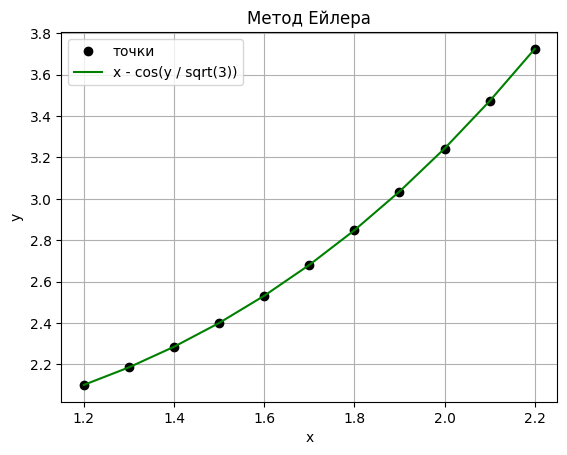

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x - np.cos(y / np.sqrt(3))

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 1.2, 2.2, 0.1, 2.1

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "ok", x, y, "green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x - cos(y / sqrt(3))"])
plt.grid()
plt.show()

In [ ]:
#Додати перевірку odeint для першого завдання


In [ ]:
#додати перевірку solve_ivp для перешого завдання

#Метод Ейлера-Коші

x = [0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 
y = [1.3    1.312  1.3347 1.3685 1.414  1.4716 1.542  1.6258 1.7239 1.837
 1.9663]


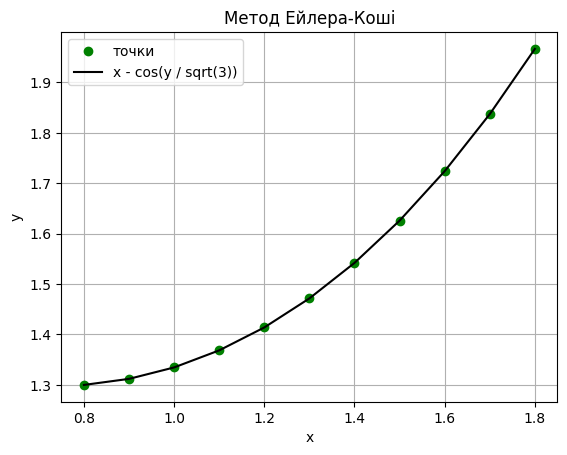

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x - np.cos(y / np.sqrt(3))

a = 0.8  # ліва межа відрізку
b = 1.8  # права межа відрізку
h = 0.1  # крок
y0 = 1.3  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "og", x, y, "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "x - cos(y / sqrt(3))"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.  0.2 0.4 0.6 0.8 1. ]
y= [2.1        2.04667343 2.02954033 2.05268992 2.12068417 2.23875516]


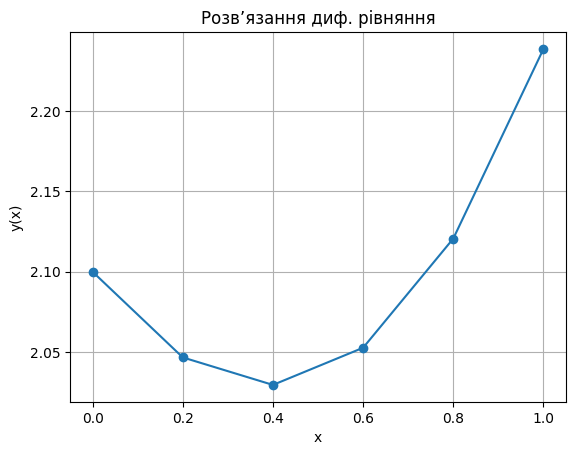

In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x - np.cos(y / np.sqrt(3))

# Початкова умова
y0 = 2.1

# Значення x
x = np.array([i * 0.2 for i in range(0, 6)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [0.  0.2 0.4 0.6 0.8 1. ]
y= [2.1        2.04668331 2.02958049 2.05269713 2.1206521  2.23872753]


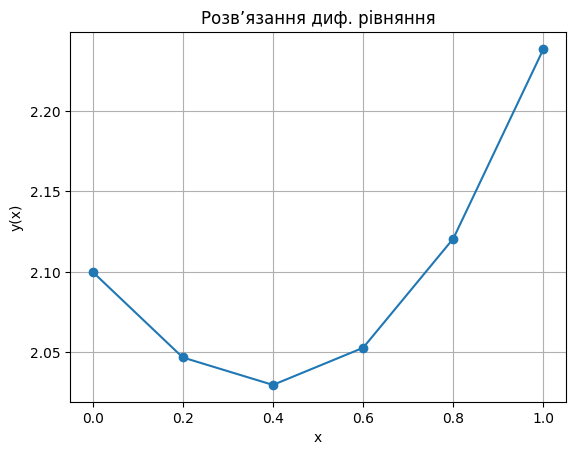

In [34]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x - np.cos(y / np.sqrt(3))

# Початкова умова
y0 = [2.1]  # Потрібно передати як список

# Значення x
x = np.linspace(0, 1, 6)

# Розв'язання ODE
sol = solve_ivp(model, [0, 1], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()
